In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("PriceDataSet.csv")

In [34]:
df.head()  # Return the first 5 rows of the DataFrame.

,weight,price
0,1,10
1,2,20
2,3,25
3,4,40
4,5,45


In [35]:
# The number of rows to return. Default value is 5. here 10 rows are returned
df.head(10)

,weight,price
0,1,10
1,2,20
2,3,25
3,4,40
4,5,45
5,6,75
6,7,90
7,8,100
8,9,115
9,10,120


In [36]:
# The shape is the number of rows and columns of the DataFrame. (rows, columns)
df.shape

(15, 2)

In [37]:
# computes the count of missing values (NaN/None) in each column of the DataFrame df.
df.isnull().sum()

weight    0
price     0
dtype: int64

In [38]:
df.columns  # Columns of the dataset

Index(['weight', 'price'], dtype='object')

In [39]:
# takes the 'weight' column from the DataFrame df, converts it into a NumPy array, and assigns it to the variable X.
X = df[['weight']].values
y = df['price']

In [40]:
X[0:10]

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [41]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15]], dtype=int64)

#Visualization


In [42]:
X.max()

15

C:\Users\Samiul\AppData\Local\Temp\ipykernel_18976\1689144224.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xticks(np.arange(min(X), max(X)+1, 1.0))


Text(0.5, 1.0, 'Price prediction')

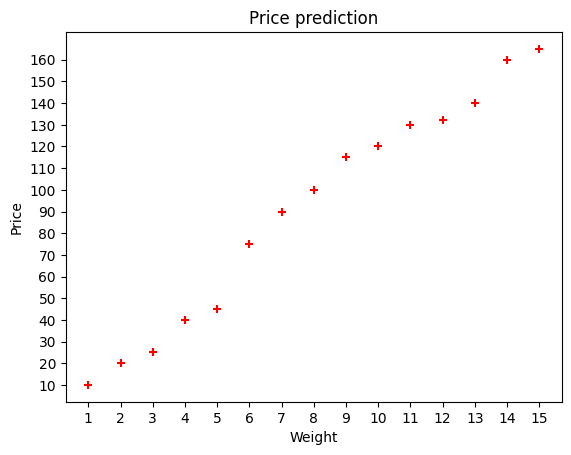

In [43]:
# The scatter() function plots one dot for each observation. It needs two arrays of the same length, one for the values of the x-axis, and one for values on the y-axis:
plt.scatter(X, y, marker='+', color='red')
plt.xticks(np.arange(min(X), max(X)+1, 1.0))
plt.yticks(np.arange(min(y), max(y)+1, 10.0))
plt.xlabel("Weight")  # set a label for the x- and y-axis.
plt.ylabel("Price")
plt.title("Price prediction")  # set a title for the scatter plot.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.25, random_state=1)

1. **X_train, X_test, y_train, y_test**: These are variables that will hold the split data. Here's what each of them represents:

   - `X_train`: This will store the feature data (input variables) that will be used to train the machine learning model.
   - `X_test`: This will store a different set of feature data that the trained model will be evaluated on.
   - `y_train`: This will store the corresponding target data (output variable) for the training set.
   - `y_test`: This will store the corresponding target data for the testing set.

2. **train_test_split(X, y, test_size=.25, random_state=1)**: This is a function call to split the data into training and testing sets. Here's what the arguments mean:
   - `X`: This is the feature data, which you want to split.
   - `y`: This is the target data, corresponding to the feature data `X`.
   - `test_size`: This parameter specifies the proportion of the data that should be allocated for the testing set. In this case, `test_size=.25` indicates that 25% of the data will be used for testing, and 75% will be used for training.
   - `random_state`: This parameter is used to seed the random number generator. This ensures that if you run the code multiple times with the same `random_state` value, you'll get the same split each time. It's useful for reproducibility.


In [46]:
X_test

array([[4],
       [8],
       [7],
       [3]], dtype=int64)

In [47]:
y_test

3     40
7    100
6     90
2     25
Name: price, dtype: int64

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
reg = LinearRegression()

In [50]:
# This is a method of the regression model class (such as LinearRegression) that is used to train the model using the provided training data.
reg.fit(X_train, y_train)

LinearRegression()

In [51]:
reg.predict(X_test)  # Predicting the Test set results

array([45.28752979, 90.75694996, 79.38959492, 33.92017474])

In [52]:
y_test

3     40
7    100
6     90
2     25
Name: price, dtype: int64

p:\CSE413-Big Data and IoT Lab\myenv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


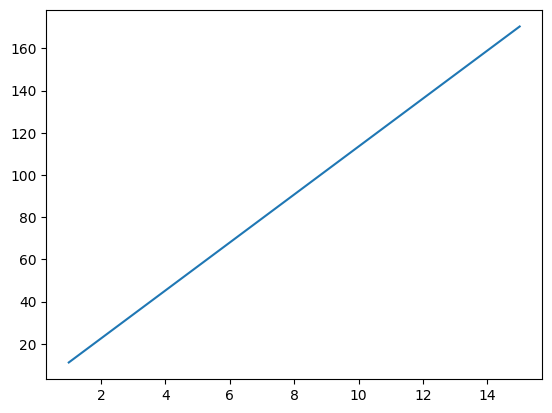

In [53]:

plt.plot(df['weight'], reg.predict(df[['weight']]))

p:\CSE413-Big Data and IoT Lab\myenv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


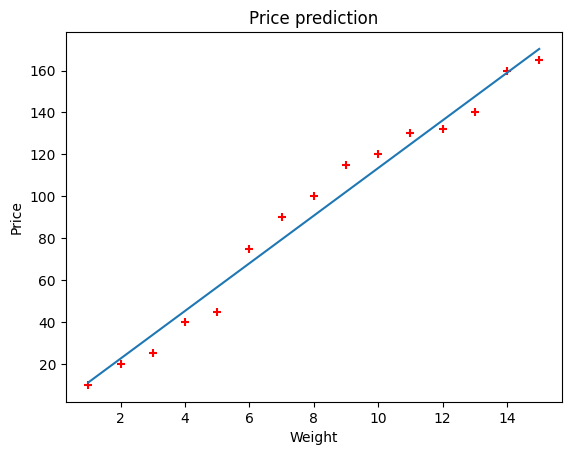

In [54]:
plt.scatter(X, y, marker='+', color='red')
plt.xlabel("Weight")
plt.ylabel("Price")
plt.title("Price prediction")
plt.plot(df['weight'], reg.predict(df[['weight']]))

In [55]:
reg.intercept_

-0.18189038919774703

In [56]:
reg.coef_

array([11.36735504])

In [57]:
reg.predict(X_test)

array([45.28752979, 90.75694996, 79.38959492, 33.92017474])

In [58]:
y_test

3     40
7    100
6     90
2     25
Name: price, dtype: int64

In [59]:
b = 11.3674*3 - .018189  # y = mx + c. m = 3, c = -0.018189, x = 11.3674

In [60]:
b

34.084011

In [61]:
reg.predict([[3]])

array([33.92017474])

In [62]:
reg.score(X_test, y_test)

0.9249051530006029

The score() method computes the R-squared score, which is a value between 0 and 1. Here's what it indicates:

R-squared = 1: This indicates that the model's predictions perfectly match the actual target values. Every data point lies exactly on the regression line.
R-squared = 0: This means that the model's predictions provide no better insight into the target variable than simply predicting the mean of the target variable for all observations. In other words, the model does not capture any meaningful variation in the data.
R-squared between 0 and 1: This value indicates the proportion of the variance in the target variable that is explained by the model. A higher R-squared indicates a better fit, but the interpretation of a "good" R-squared value depends on the context of the problem.
